In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet

## Load dataset

In [2]:
df = pd.read_csv('../data/denver_listing_dates_with_ct.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [3]:
df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price,geometry,index_right,ct_key
0,666680976,80113,39.65232,-104.97613,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-104.97613 39.65232),10693.0,8.005006e+09
1,138826052,80123,39.62523,-105.08648,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.08648 39.62523),9869.0,8.059012e+09
2,666683709,80204,39.74122,-105.05241,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.05241 39.74122),10476.0,8.031001e+09
3,137981678,80241,39.91465,-104.93076,2016-03-01,2016-04-21,NaN,NaN,NaN,Sale,320000.0,POINT (-104.93076 39.91465),9719.0,8.001009e+09
4,410875086,80202,39.74783,-104.98640,2016-03-01,2016-05-02,NaN,NaN,NaN,Sale,475000.0,POINT (-104.9864 39.74783),10465.0,8.031002e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439427 entries, 0 to 439426
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   property_id     439427 non-null  int64         
 1   zipcode         439427 non-null  int64         
 2   latitude        439427 non-null  float64       
 3   longitude       439427 non-null  float64       
 4   list_date       439427 non-null  datetime64[ns]
 5   sale_date       328118 non-null  datetime64[ns]
 6   withdrawn_date  38244 non-null   object        
 7   expired_date    21638 non-null   object        
 8   cancelled_date  79 non-null      object        
 9   current_status  439427 non-null  object        
 10  sale_price      327929 non-null  float64       
 11  geometry        439427 non-null  object        
 12  index_right     439427 non-null  float64       
 13  ct_key          439427 non-null  float64       
dtypes: datetime64[ns](2), float64(5), in

## Plot number of sales and number of listing overtime

In [5]:
df_list_agg = df['property_id'].groupby([df.list_date.dt.year, df.list_date.dt.month]).agg(count='count')
df_sale_agg = df['property_id'].groupby([df.sale_date.dt.year, df.sale_date.dt.month]).agg(count='count')

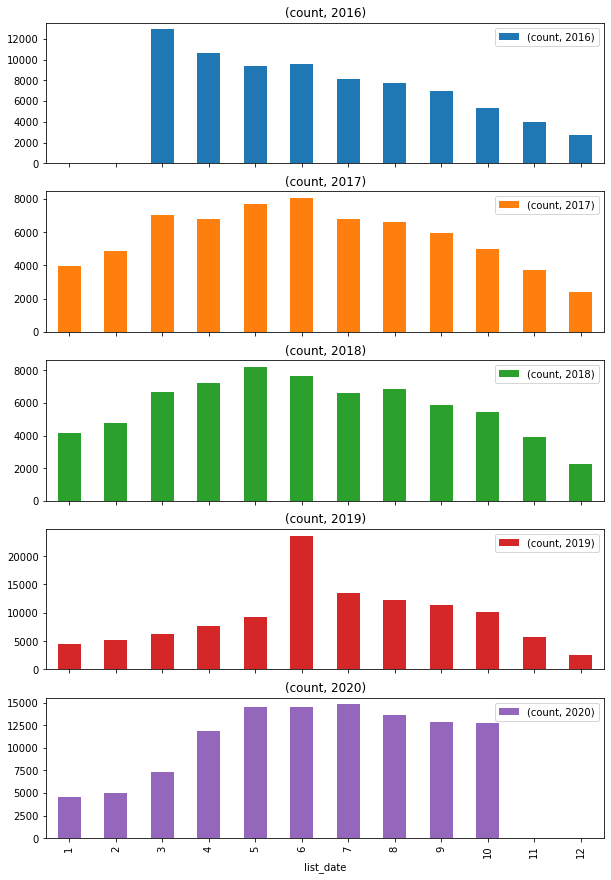

In [6]:
ax_list = df_list_agg.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

In [7]:
df_list_agg

count
list_date list_date       
2016      3          12897
          4          10652
          5           9340
          6           9525
          7           8170
          8           7697
          9           6950
          10          5371
          11          3966
          12          2768
2017      1           3990
          2           4848
          3           7038
          4           6812
          5           7696
          6           8037
          7           6775
          8           6629
          9           5958
          10          4985
          11          3712
          12          2381
2018      1           4144
          2           4769
          3           6646
          4           7246
          5           8219
          6           7675
          7           6623
          8           6832
          9           5852
          10          5427
          11          3934
          12          2242
2019      1           4562
          2           5153
          3           6168
          4           7605
          5           9253
          6          23626
          7          13495
          8          12281
          9          11373
          10         10093
          11          5688
          12          2570
2020      1           4538
          2           4996
          3           7365
          4          11882
          5          14457
          6          14497
          7          14812
          8          13601
          9          12816
          10         12790

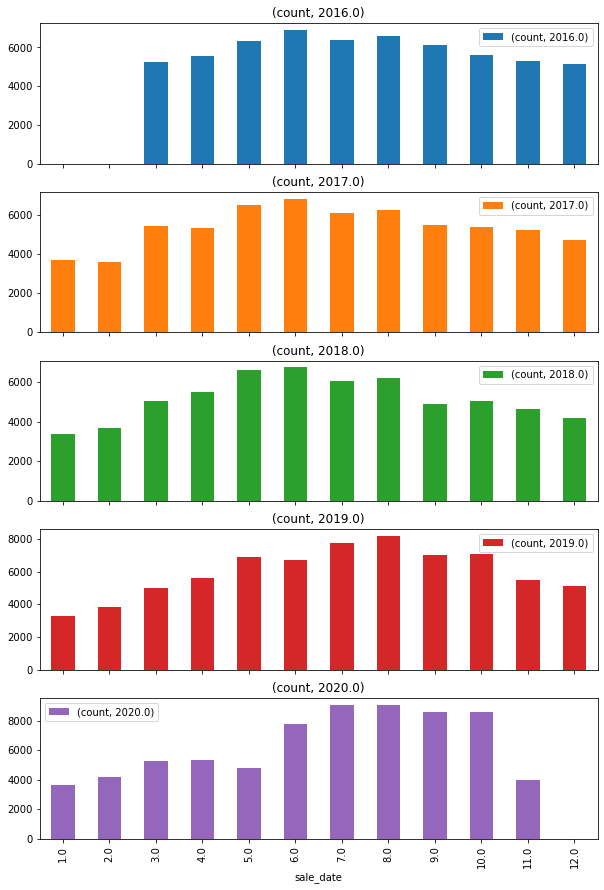

In [8]:
ax_sale = df_sale_agg.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

In [9]:
df_list_agg_week = df['property_id'].groupby([df.list_date.dt.year, df.list_date.dt.week]).agg(count='count')
df_sale_agg_week = df['property_id'].groupby([df.sale_date.dt.year, df.sale_date.dt.week]).agg(count='count')

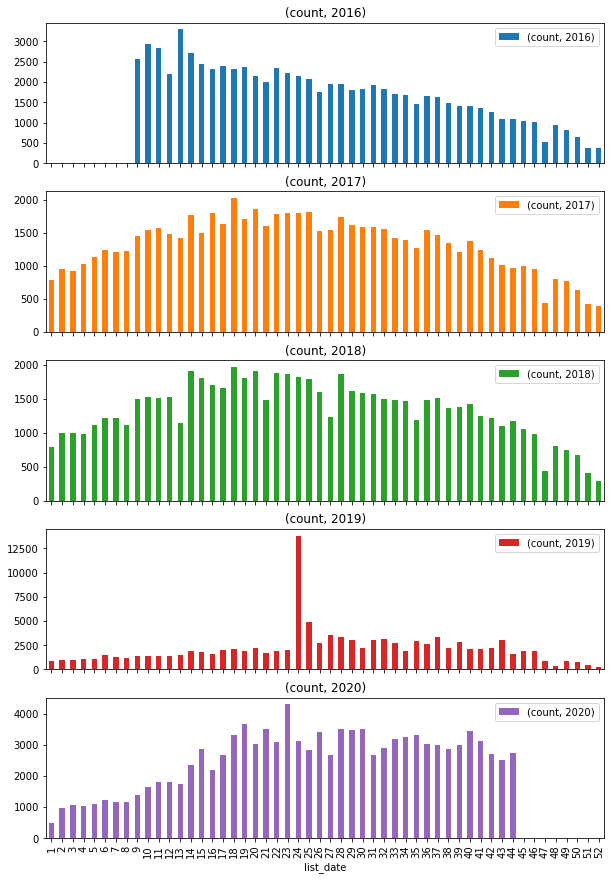

In [10]:
ax_list_week = df_list_agg_week.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

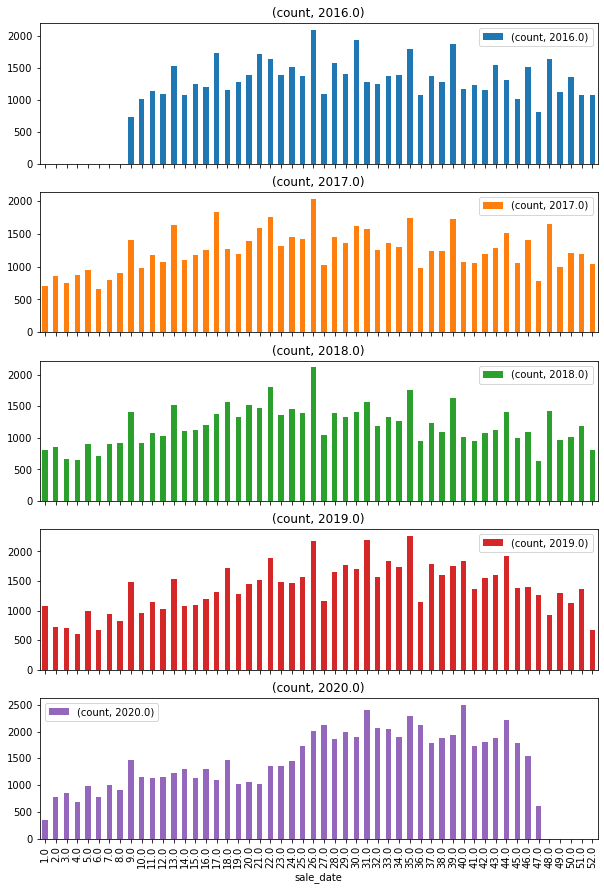

In [11]:
ax_sale_week = df_sale_agg_week.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

In [12]:
# Denver employement also has data about jobs, but from a different source
denver_employment = pd.read_excel('../data/denver_employment.xlsx')
constructions = pd.read_excel('../data/denver_constructions.xlsx')

In [13]:
denver_employment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1458266,1467192,1472623,1479460,1486175,1496785,1502530,1505017,1511621,1516132,1512232,1506087
1,2017,1503753,1516025,1523841,1530715,1540580,1557094,1563275,1563350,1569908,1564281,1567030,1558187
2,2018,1554007,1570705,1573964,1580242,1588872,1600738,1603445,1598480,1599272,1605548,1601809,1594915
3,2019,1593933,1608076,1606088,1611538,1623628,1642609,1644754,1650305,1655205,1656503,1651772,1650053
4,2020,1649326,1656521,1582456,1434310,1468403,1528284,1546248,1560865,1586032,1583043,1605301,1575283


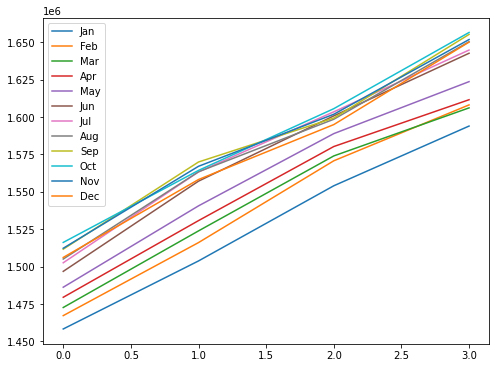

In [14]:
denver_employment.iloc[0:4,1:].plot(figsize=(8,6))

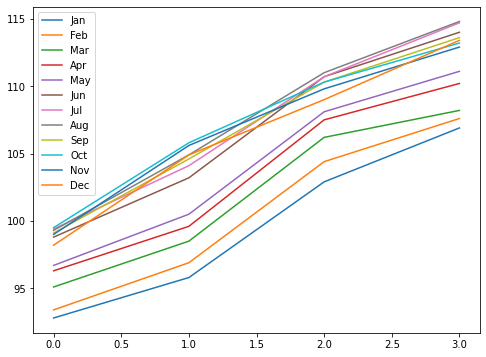

In [15]:
constructions.iloc[0:4,1:].plot(figsize=(8,6))

In [16]:
property_info = pd.read_csv('../data/denver_property_info.csv')

/Users/namluu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
property_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398807 entries, 0 to 398806
Data columns (total 70 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cc_property_id                 398807 non-null  int64  
 1   data_source                    398807 non-null  object 
 2   address                        398806 non-null  object 
 3   city                           398786 non-null  object 
 4   zipcode                        398807 non-null  int64  
 5   cc_property_address_county     153262 non-null  object 
 6   fips                           394914 non-null  float64
 7   apn                            88648 non-null   object 
 8   property_guid                  334 non-null     object 
 9   latitude                       397997 non-null  float64
 10  longitude                      397997 non-null  float64
 11  sqft                           375631 non-null  float64
 12  state                         

In [19]:
property_info = property_info[property_info['bedrooms'].notnull()]

In [23]:
property_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166524 entries, 164 to 398802
Data columns (total 70 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cc_property_id                 166524 non-null  int64  
 1   data_source                    166524 non-null  object 
 2   address                        166523 non-null  object 
 3   city                           166517 non-null  object 
 4   zipcode                        166524 non-null  int64  
 5   cc_property_address_county     86814 non-null   object 
 6   fips                           163201 non-null  float64
 7   apn                            81814 non-null   object 
 8   property_guid                  331 non-null     object 
 9   latitude                       165875 non-null  float64
 10  longitude                      165875 non-null  float64
 11  sqft                           161567 non-null  float64
 12  state                       

In [30]:
property_info = property_info.rename(columns={"cc_property_id": "property_id"})

In [25]:
df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price,geometry,index_right,ct_key
0,666680976,80113,39.65232,-104.97613,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-104.97613 39.65232),10693.0,8.005006e+09
1,138826052,80123,39.62523,-105.08648,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.08648 39.62523),9869.0,8.059012e+09
2,666683709,80204,39.74122,-105.05241,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.05241 39.74122),10476.0,8.031001e+09
3,137981678,80241,39.91465,-104.93076,2016-03-01,2016-04-21,NaN,NaN,NaN,Sale,320000.0,POINT (-104.93076 39.91465),9719.0,8.001009e+09
4,410875086,80202,39.74783,-104.98640,2016-03-01,2016-05-02,NaN,NaN,NaN,Sale,475000.0,POINT (-104.9864 39.74783),10465.0,8.031002e+09


In [31]:
houses = pd.merge(df, property_info, on='property_id')

In [32]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166155 entries, 0 to 166154
Data columns (total 83 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   property_id                    166155 non-null  int64         
 1   zipcode_x                      166155 non-null  int64         
 2   latitude_x                     166155 non-null  float64       
 3   longitude_x                    166155 non-null  float64       
 4   list_date                      166155 non-null  datetime64[ns]
 5   sale_date                      90186 non-null   datetime64[ns]
 6   withdrawn_date                 30419 non-null   object        
 7   expired_date                   5389 non-null    object        
 8   cancelled_date                 70 non-null      object        
 9   current_status                 166155 non-null  object        
 10  sale_price                     89999 non-null   float64       
 11  

In [47]:
houses.iloc[30]['zipcode_x']

80020

In [48]:
houses.iloc[30]['zipcode_y']

80020

In [49]:
new_df = houses[['property_id', 'latitude_x', 'longitude_x', 'list_date', 'sale_date', 'withdrawn_date', 'expired_date', 'cancelled_date', 'zipcode_x', 'sqft', 'bedrooms', 'full_baths', 'half_baths', 'rooms']]

In [53]:
new_df = new_df.rename(columns={"latitude_x": "latitude", 'longitude_x': 'longitude', 'zipcode_x': 'zipcode'})

In [54]:
new_df.head()

,property_id,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,zipcode,sqft,bedrooms,full_baths,half_baths,rooms
0,578614980,39.24476,-104.96627,2016-03-01,2016-06-10,NaN,NaN,NaN,80118,2516.0,4.0,4.0,NaN,9.0
1,578614980,39.24476,-104.96627,2019-10-04,2020-01-22,NaN,NaN,NaN,80118,2516.0,4.0,4.0,NaN,9.0
2,666683907,39.65265,-104.97606,2016-03-01,2016-06-24,NaN,NaN,NaN,80113,456.0,1.0,1.0,NaN,2.0
3,648021453,39.76551,-104.90495,2016-03-01,2016-03-01,NaN,NaN,NaN,80207,3770.0,8.0,4.0,NaN,NaN
4,660737082,39.76418,-105.04427,2016-03-01,NaT,NaN,2016-07-27,NaN,80212,2800.0,4.0,4.0,NaN,NaN


In [55]:
new_df.to_csv('denver_property_info_with_rooms_and_date.csv', index=False)